# Customer Churn Predication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
## Load the datset
churn= pd.read_csv(r'Customer-Churn-Datset(ML).csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn.shape

(7043, 21)

In [4]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
print(len(churn.columns))

21


In [6]:
## To display al columns
pd.set_option("display.max_columns", None)

In [7]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory data analysis (EDA)

## 1.) Data Cleaning

In [8]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
churn .describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
churn.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [11]:
churn.select_dtypes(include='number').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [12]:
## Remove Customer Id columns
churn.drop(['customerID'],axis=1,inplace=True)

In [13]:
## Check & remove null values
churn.isna().sum()  ## there are no null values present

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
## Check & remove duplicate values
churn.duplicated().sum()

22

In [15]:
## Remove duplicate values
churn.drop_duplicates(inplace=True)
churn.duplicated().sum()  ## there are no duplicate values present

0

In [16]:
# printing the unique values in all the columns
num_cols= churn.select_dtypes(include='number').columns
for i in churn.columns:
    if i not in num_cols:
        print(i,churn[i].unique())
        print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingM

#### Play with Total Charges Columns
- **Total Charges(object) convert into Float datatype**

In [17]:
churn[churn['TotalCharges']==' '].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [18]:
print(len(churn[churn['TotalCharges']==' ']))

11


In [19]:
## Convert whitespace into float
churn['TotalCharges']=churn['TotalCharges'].replace({' ':'0.0'})
churn['TotalCharges']=churn['TotalCharges'].astype(float)

In [20]:
print(len(churn[churn['TotalCharges']==' ']))

0


In [21]:
churn.info() ## there are cleaned data

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

**Insights till now:**
1. Customer ID removed as it is not required for modelling
2. No mmissing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0

## 2.) Data Analysis (data summarization and visualization)

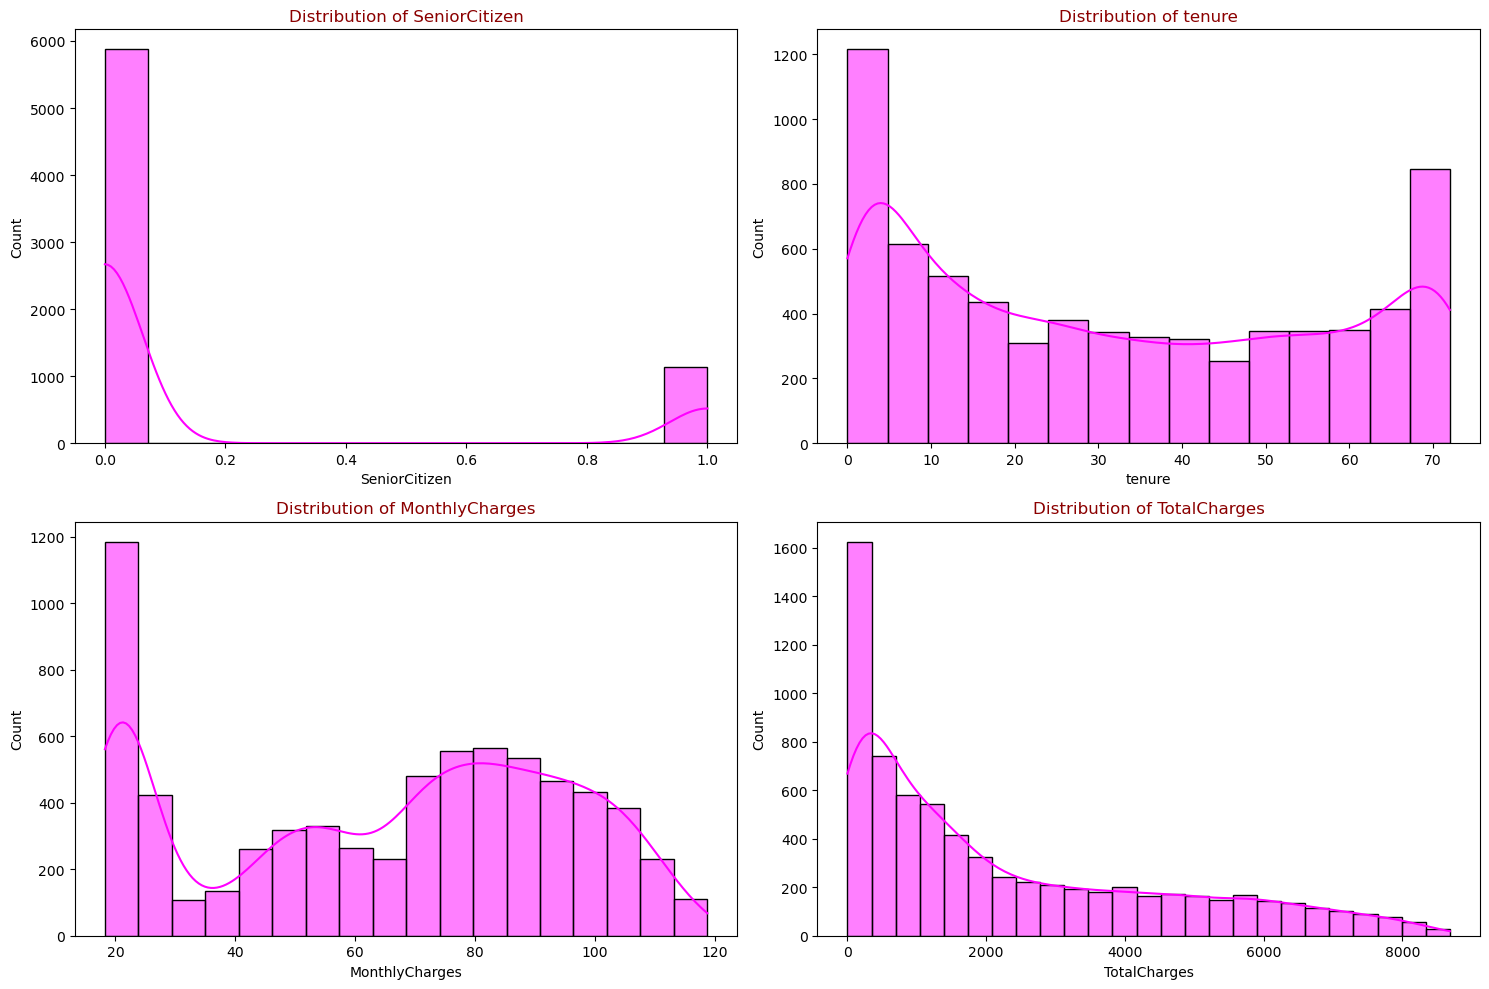

In [22]:
## Data distribution of numerical features
num_cols = churn.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols) + 1) // 2, i)  # 
    sns.histplot(x=churn[col], kde=True, color='magenta')
    plt.title(f'Distribution of {col}', color='darkred')

plt.tight_layout()
plt.show()

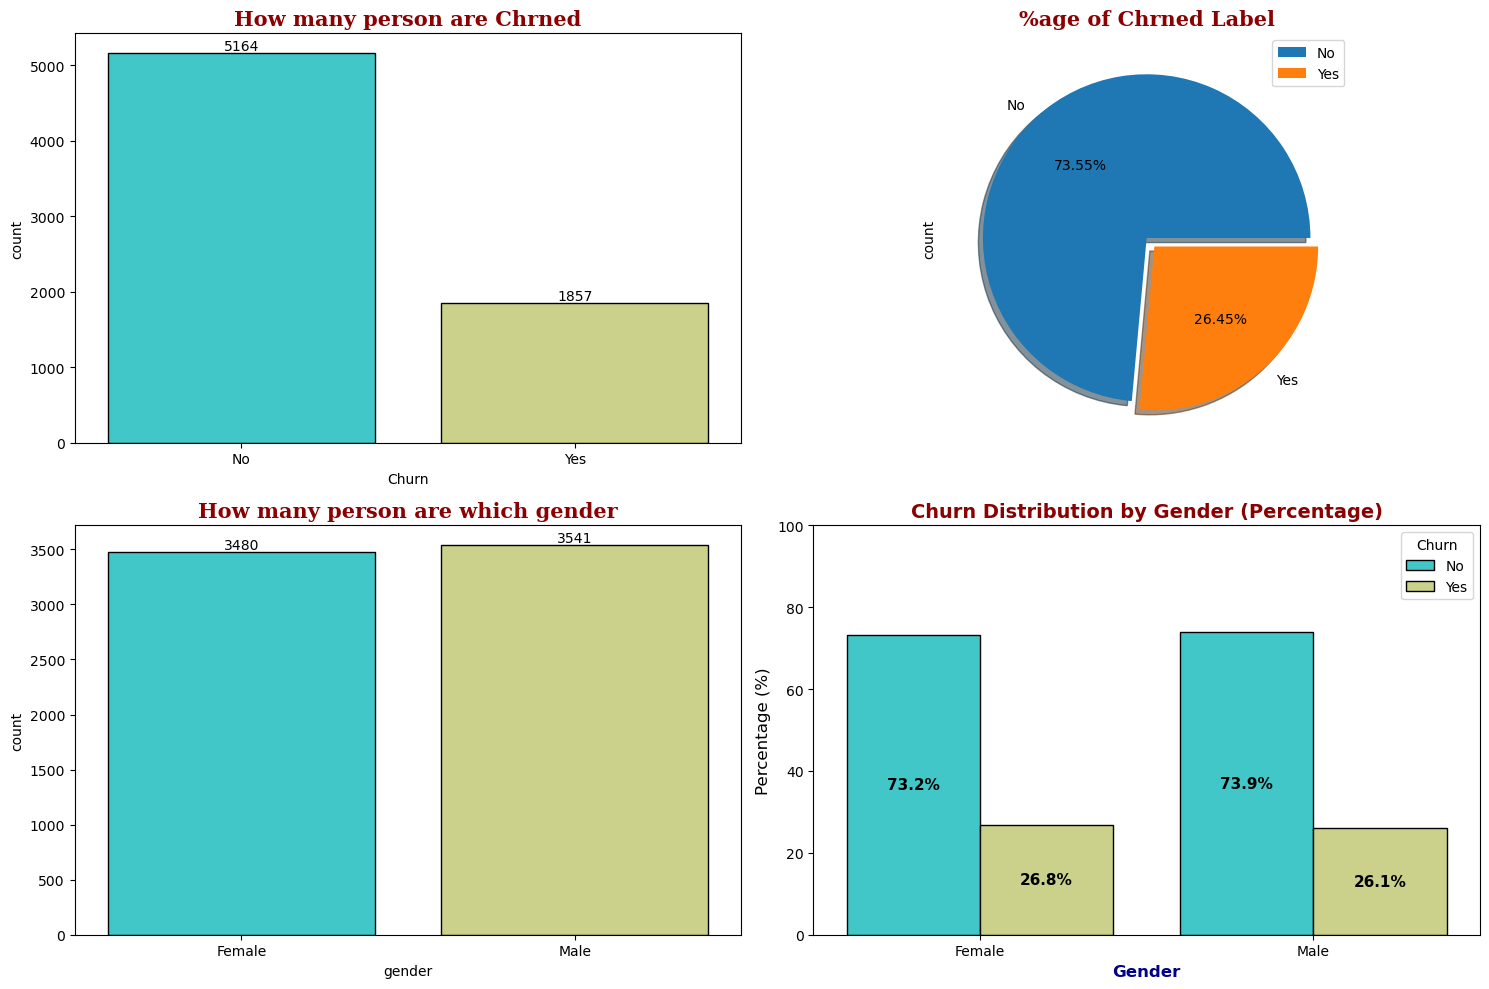

In [23]:
## Data summarization and visualization Churn Vs Gender
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax=sns.countplot(x=churn['Churn'],palette='rainbow',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('How many person are Chrned',fontdict={
    'fontsize': 15,
    'color': 'darkred',
    'weight': 'bold',
    'family': 'serif'})

plt.subplot(2,2,2)
churn['Churn'].value_counts().plot(kind='pie',shadow=True,autopct='%0.2f%%',explode=[0,0.07])
plt.legend(loc='upper right')
plt.title('%age of Chrned Label',fontdict={
    'fontsize': 15,
    'color': 'darkred',
    'weight': 'bold',
    'family': 'serif'})

plt.subplot(2,2,3)
ax=sns.countplot(x=churn['gender'],palette='rainbow',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('How many person are which gender',fontdict={
    'fontsize': 15,
    'color': 'darkred',
    'weight': 'bold',
    'family': 'serif'})

plt.subplot(2,2,4)
# Step 1: Group and calculate percentage
churn_counts = churn.groupby(['gender', 'Churn']).size().reset_index(name='count')
total_by_gender = churn_counts.groupby('gender')['count'].transform('sum')
churn_counts['percentage'] = churn_counts['count'] / total_by_gender * 100

# Step 2: Plot stacked bar chart using barplot
ax = sns.barplot(x='gender', y='percentage', hue='Churn', data=churn_counts, estimator=sum, palette='rainbow',edgecolor='black')

# Step 3: Annotate bars with percentage values
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height / 2),
                    ha='center', va='center', fontsize=11, color='black', weight='bold')

plt.title('Churn Distribution by Gender (Percentage)', fontsize=14, color='darkred', weight='bold')
plt.xlabel('Gender', fontsize=12, color='darkblue', weight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

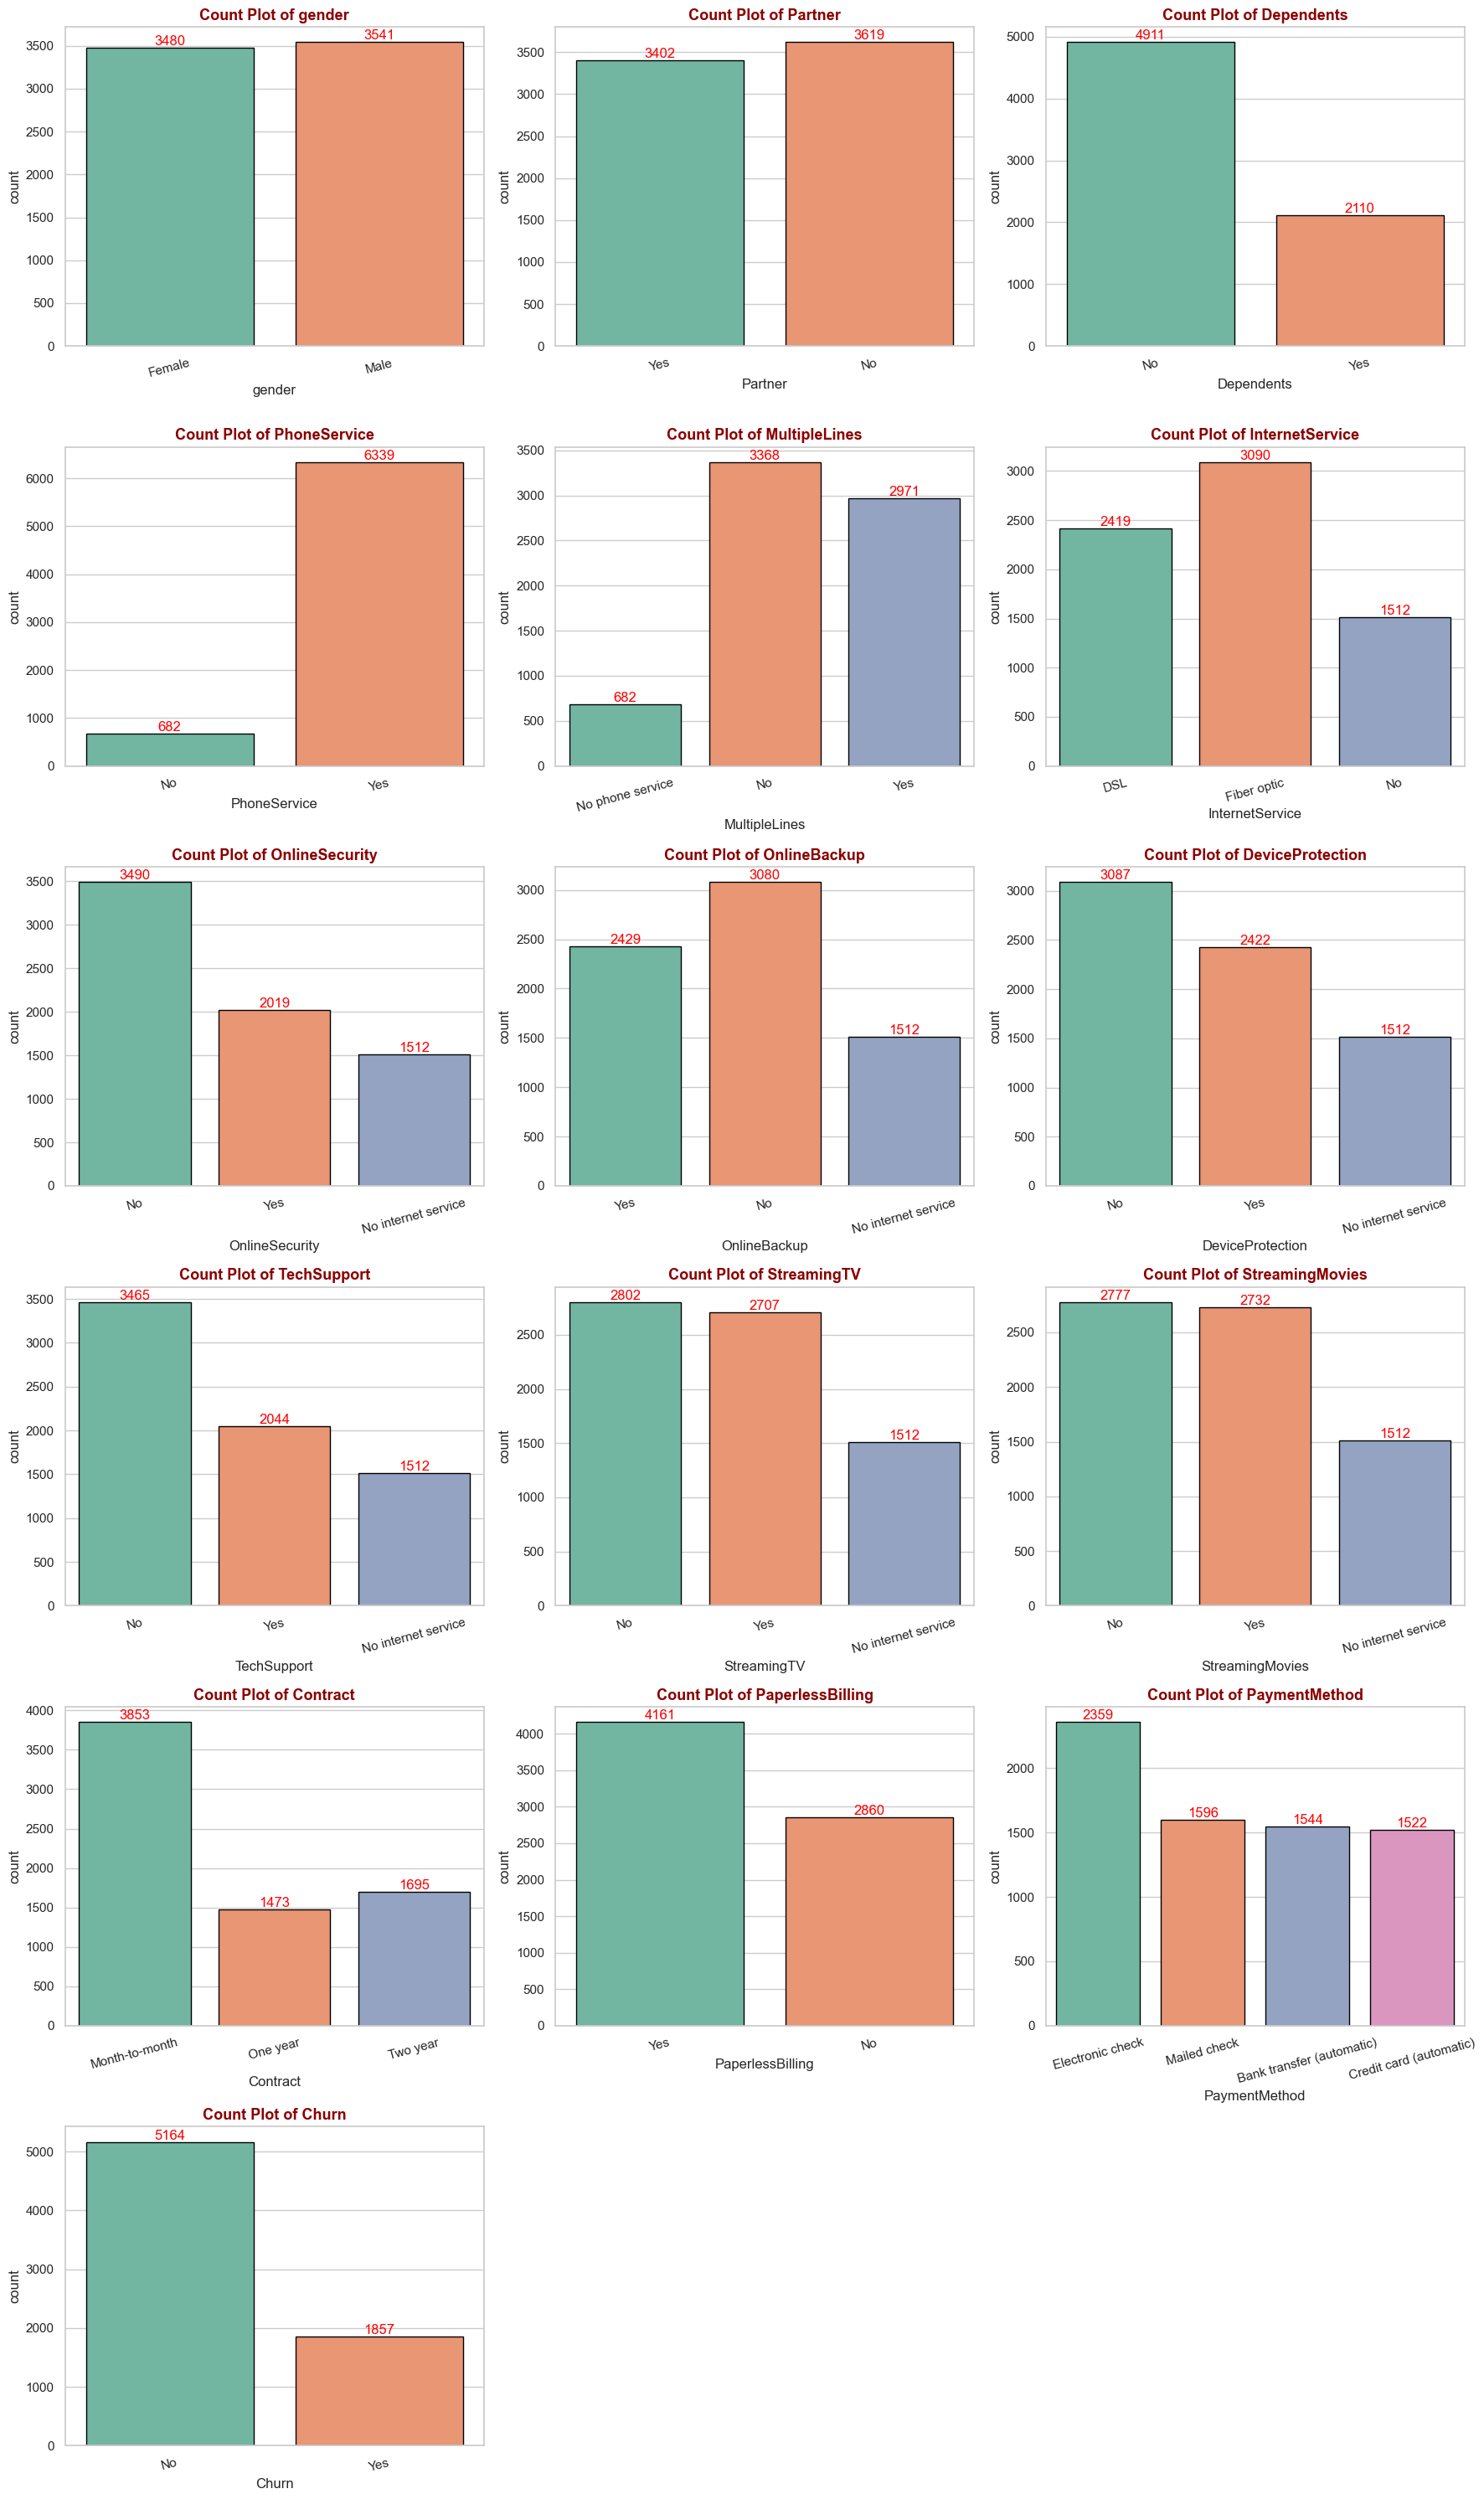

In [24]:
cat_cols = churn.select_dtypes(include='object').columns

sns.set(style="whitegrid")
plt.figure(figsize=(18, 30))

n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(x=col, data=churn, palette='Set2',edgecolor='black')
    
    # Dynamically label all bars safely
    for container in ax.containers:
        ax.bar_label(container, color='red', fontsize=12)

    plt.title(f"Count Plot of {col}", fontsize=13,color='darkred',weight='bold')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

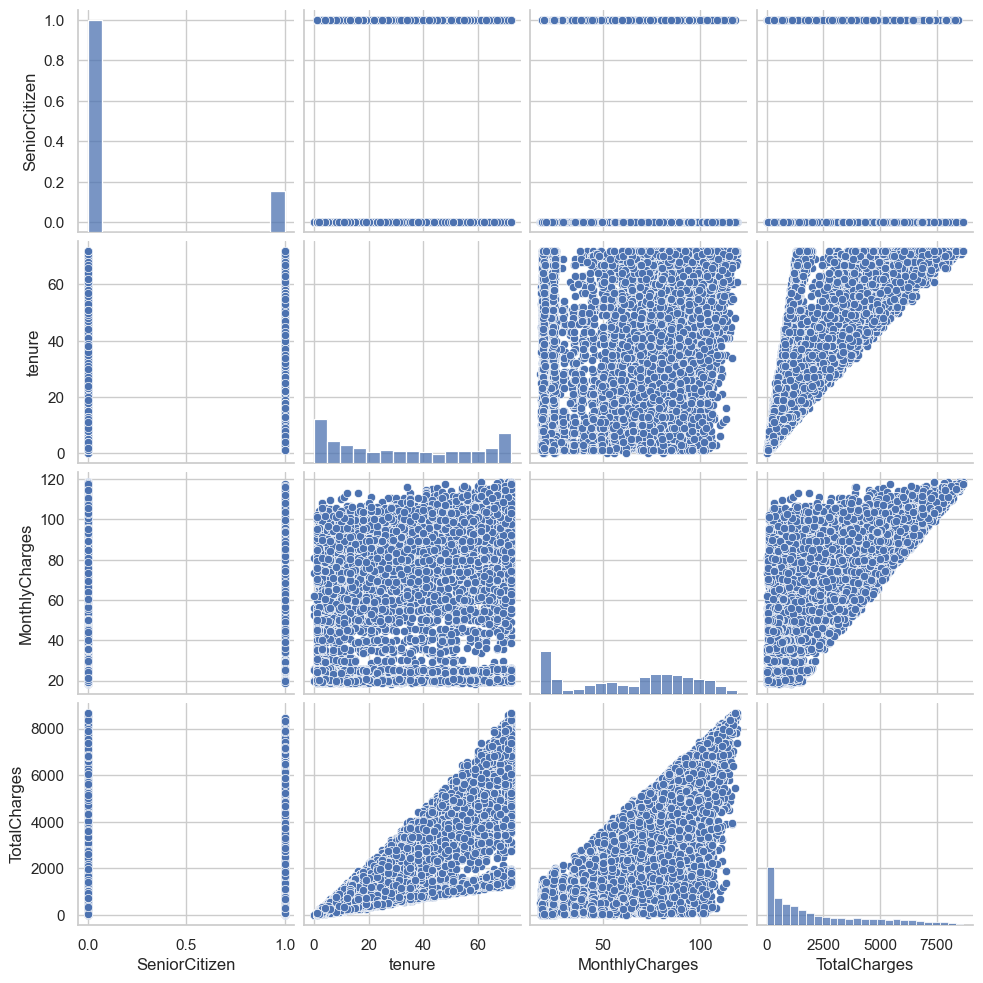

In [25]:
sns.pairplot(data=churn)
plt.show()

In [26]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


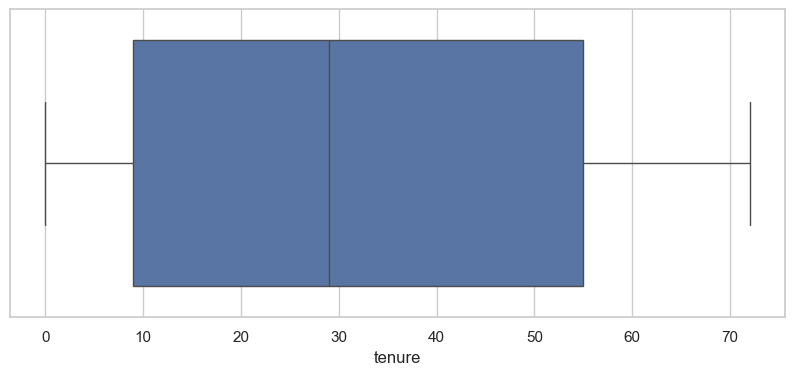

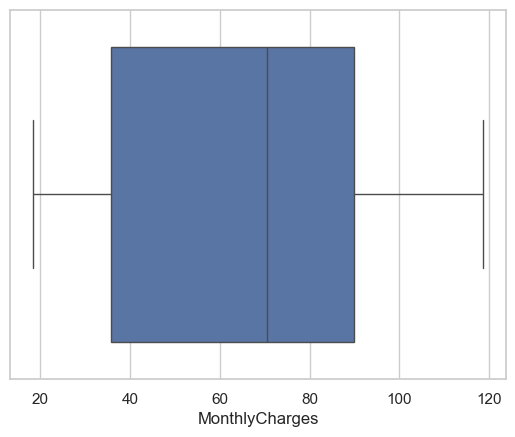

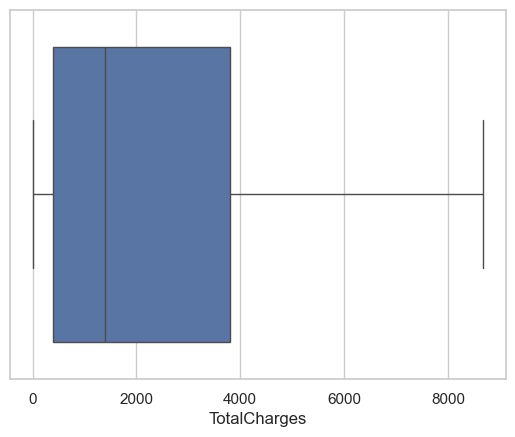

In [27]:
## Play with Outliers
plt.figure(figsize=(10,4))
num_cols= ['tenure','MonthlyCharges','TotalCharges']
for i in num_cols:
    sns.boxplot(x=churn[i])
    plt.show()
## There are no outliers present in Dataframe

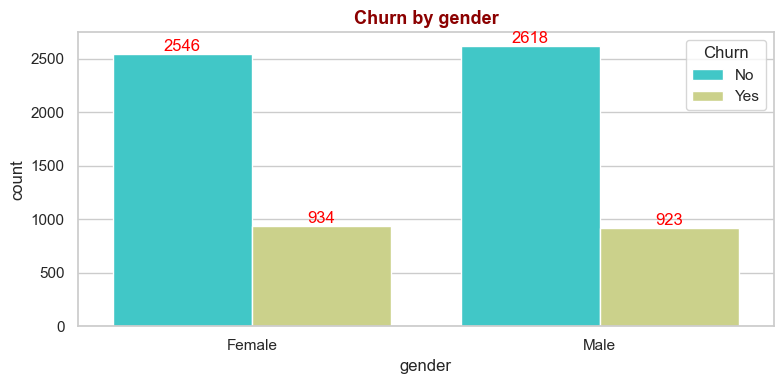

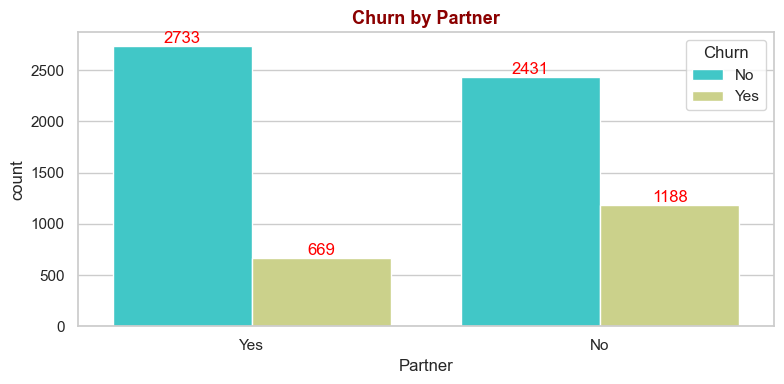

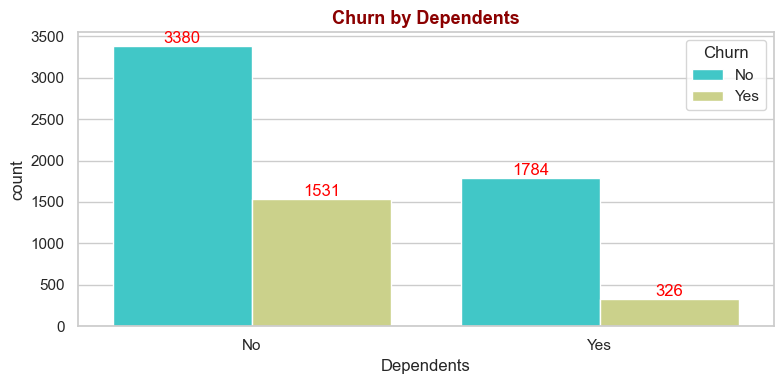

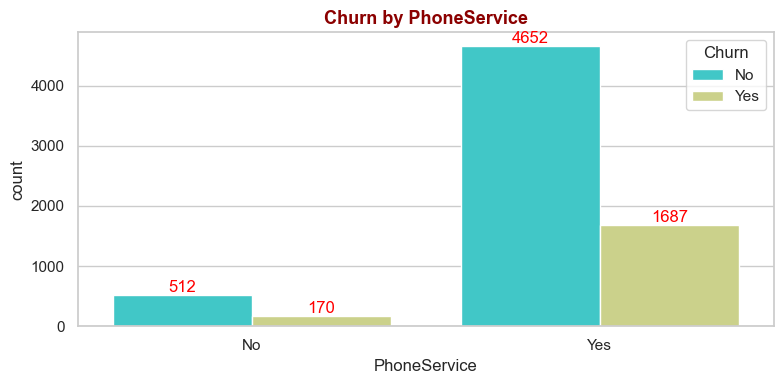

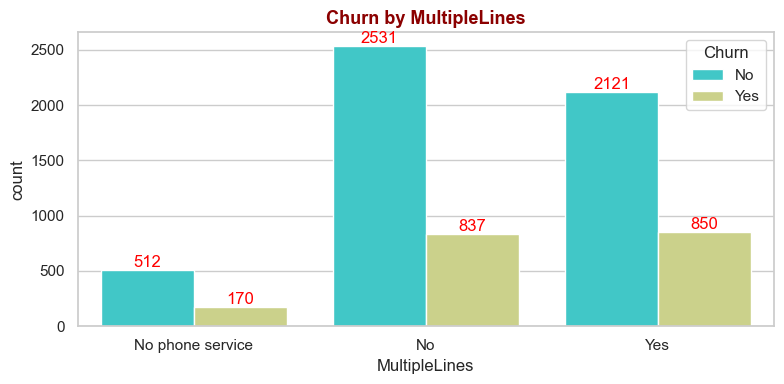

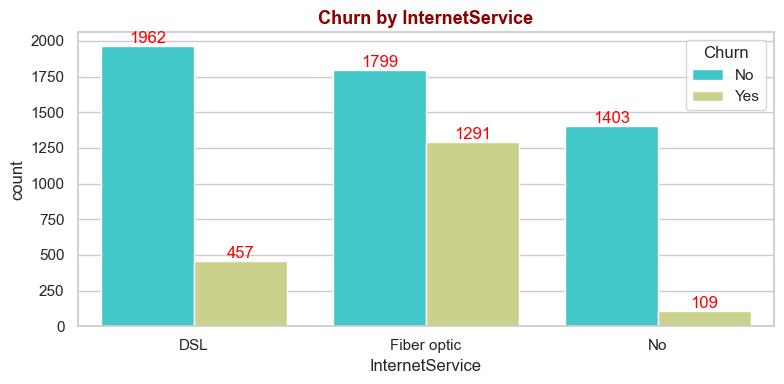

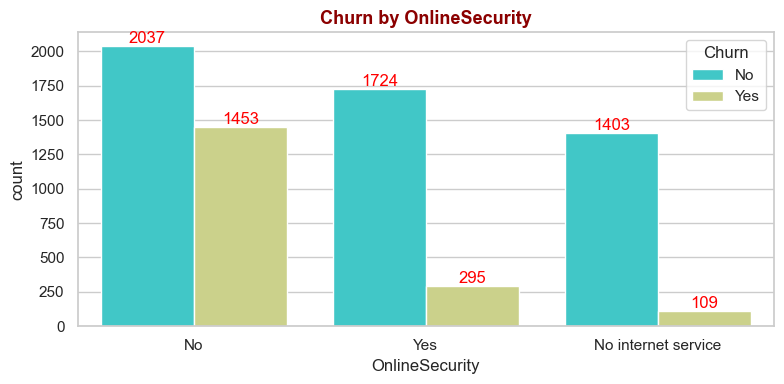

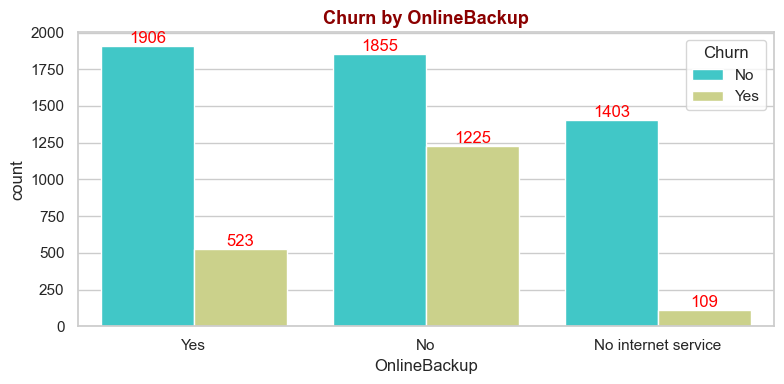

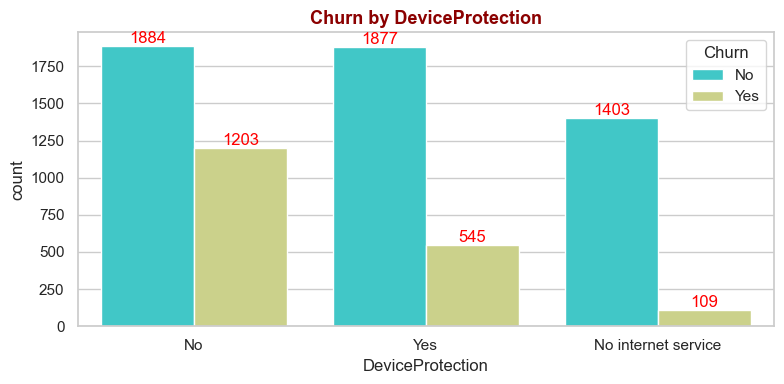

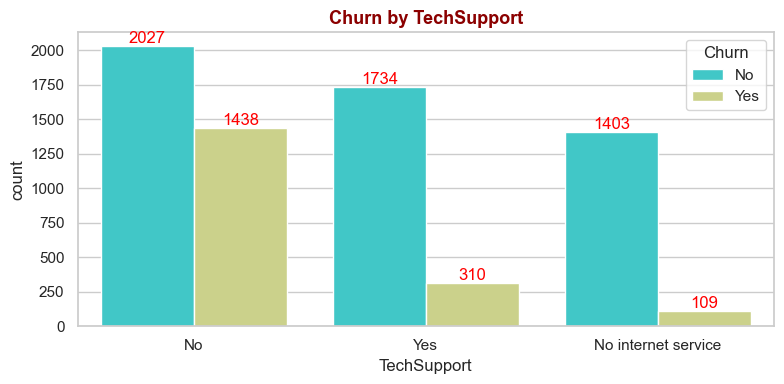

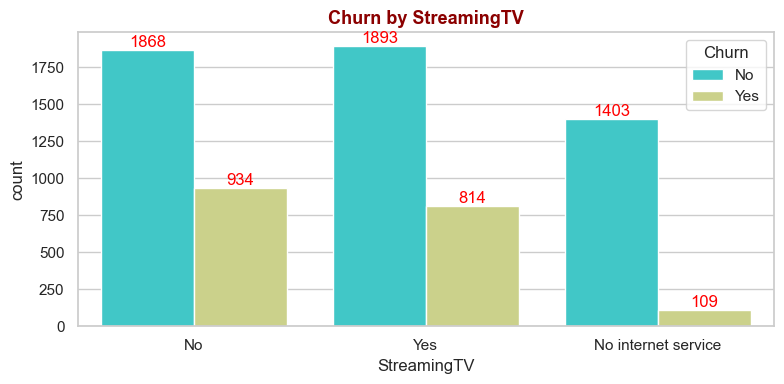

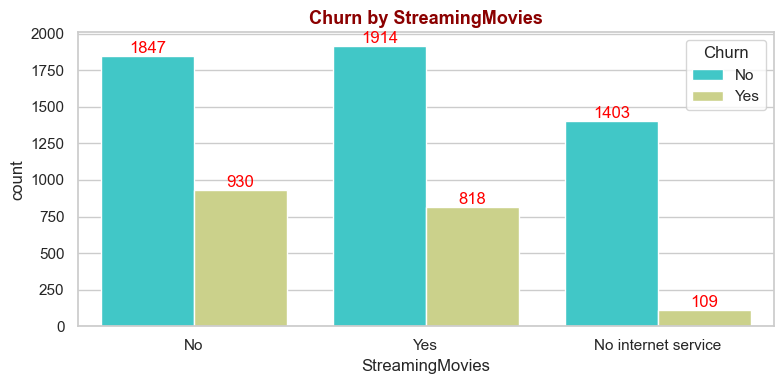

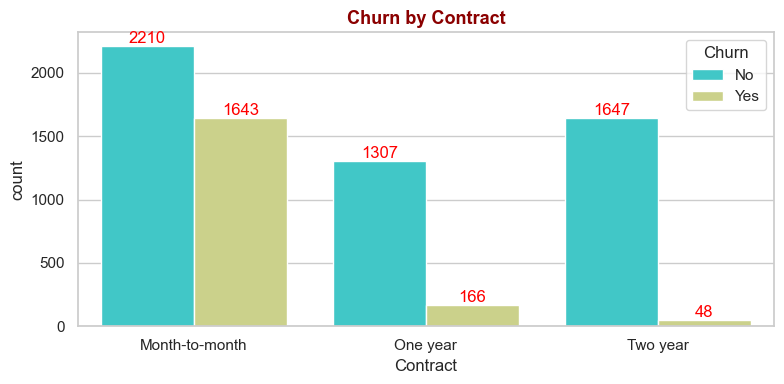

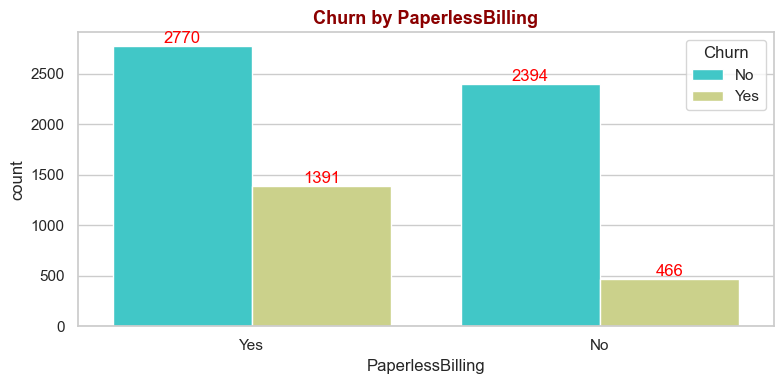

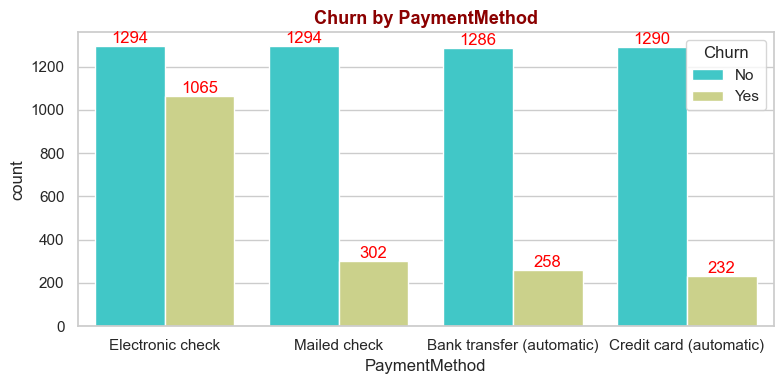

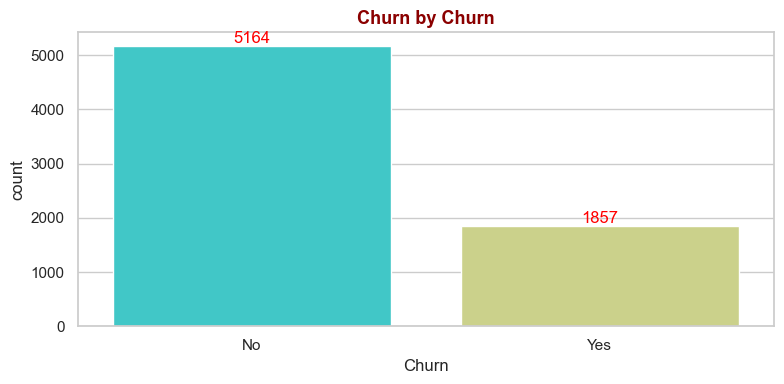

In [28]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax=sns.countplot(x=col, hue='Churn', data=churn, palette='rainbow')
    for container in ax.containers:
        ax.bar_label(container, color='red', fontsize=12)
    
    plt.title(f'Churn by {col}', fontsize=13, color='darkred', weight='bold')
    plt.tight_layout()
    plt.show()


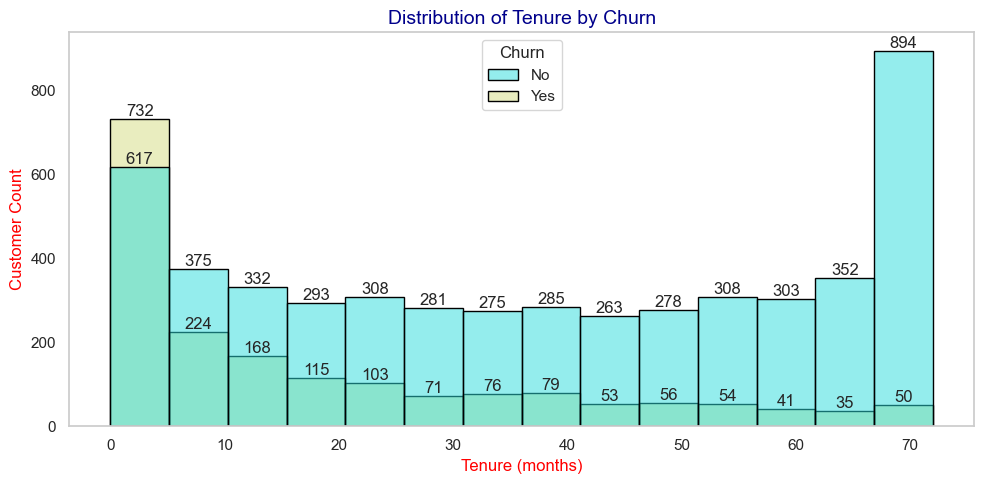

In [29]:
## Tenure Vs Churn

plt.figure(figsize=(10, 5))
ax=sns.histplot(x='tenure', hue='Churn', data=churn, bins=14, palette='rainbow',edgecolor='black')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.grid(False) 
plt.title("Distribution of Tenure by Churn", fontsize=14, color='darkblue')
plt.xlabel("Tenure (months)",color='red')
plt.ylabel("Customer Count",color='red')
plt.tight_layout()
plt.show()

## Feature Engineering

In [30]:
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [31]:
print(len(cat_cols))

16


In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
## Apply Label Encoder for all categorical features
churn_encoded = churn.copy()
for col in cat_cols:
    le = LabelEncoder()
    churn_encoded[col] = le.fit_transform(churn_encoded[col])
churn_encoded=churn_encoded.astype(int)
churn_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1840,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151,1


In [33]:
churn_encoded.shape

(7021, 20)

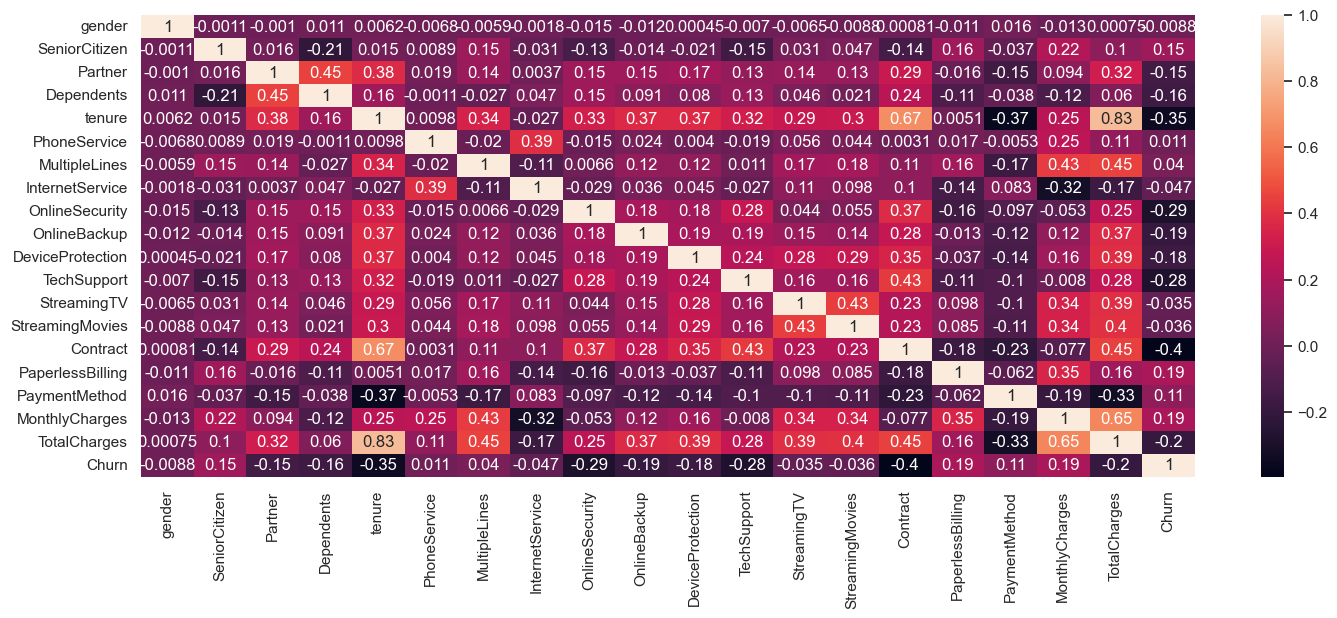

In [34]:
## Find relation between Input and output Features
plt.figure(figsize=(17,6))
sns.heatmap(data=churn_encoded.corr(),annot=True)
plt.show()

In [35]:
## Take x=input & y=output variable
x=churn_encoded.drop(['Churn'],axis=1)
y= churn_encoded['Churn']

In [36]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1840
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151


In [37]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [38]:
## Feature Scaling of input variable(x)
scaling= StandardScaler()
scaling.fit(x)
new_df= pd.DataFrame(scaling.transform(x),columns=x.columns)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.008726,-0.440508,1.031400,-0.655475,-1.282728,-3.048725,0.059614,-1.181531,-0.918456,1.240410,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,0.402156,-1.176789,-0.995855
1,0.991349,-0.440508,-0.969556,-0.655475,0.062387,0.328006,-0.994674,-1.181531,1.405320,-1.029902,1.242972,-0.924901,-1.113775,-1.121714,0.368496,-1.206190,1.338965,-0.278879,-0.175276
2,0.991349,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.994674,-1.181531,1.405320,1.240410,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,1.338965,-0.378647,-0.961003
3,0.991349,-0.440508,-0.969556,-0.655475,0.510759,-3.048725,0.059614,-1.181531,1.405320,-1.029902,1.242972,1.394288,-1.113775,-1.121714,0.368496,-1.206190,-1.471460,-0.744462,-0.196893
4,-1.008726,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.994674,0.175278,-0.918456,-1.029902,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,0.402156,0.186704,-0.942032


## train test split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(new_df,y,test_size=0.20,random_state=37)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5616, 19) (1405, 19) (5616,) (1405,)


## Build a model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [41]:
models= {
    'Logistic Regression':LogisticRegression(),
    'naive bayes GaussianNB':GaussianNB(),
    'naive bayes BernoulliNB':BernoulliNB(),
    'KNN':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'SVC':SVC()
}
## Fit the models
results= []
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc= accuracy_score(y_pred,y_test)*100
    f1= f1_score(y_pred,y_test)*100
    recall= recall_score(y_pred,y_test)*100
    precision= precision_score(y_pred,y_test)*100

    ## append
    results.append({
        'model':name,
        'accuracy_score':round(acc,2),
        'f1_score':round(f1,2),
        'recall_score':round(recall,2),
        'precsion_score':round(precision,2)
    })

In [42]:
results

[{'model': 'Logistic Regression',
  'accuracy_score': 81.85,
  'f1_score': 61.88,
  'recall_score': 72.13,
  'precsion_score': 54.19},
 {'model': 'naive bayes GaussianNB',
  'accuracy_score': 77.15,
  'f1_score': 63.4,
  'recall_score': 56.16,
  'precsion_score': 72.77},
 {'model': 'naive bayes BernoulliNB',
  'accuracy_score': 77.37,
  'f1_score': 62.76,
  'recall_score': 56.78,
  'precsion_score': 70.16},
 {'model': 'KNN',
  'accuracy_score': 77.37,
  'f1_score': 54.31,
  'recall_score': 60.19,
  'precsion_score': 49.48},
 {'model': 'Decision Tree',
  'accuracy_score': 73.17,
  'f1_score': 48.85,
  'recall_score': 50.7,
  'precsion_score': 47.12},
 {'model': 'Random Forest',
  'accuracy_score': 80.07,
  'f1_score': 57.58,
  'recall_score': 68.35,
  'precsion_score': 49.74},
 {'model': 'SVC',
  'accuracy_score': 80.64,
  'f1_score': 55.7,
  'recall_score': 73.71,
  'precsion_score': 44.76}]

🏆 Best Overall Model:
- **Logistic Regression**
- Strong accuracy (81.85%)
- Best F1-score (61.03%) ⇒ balanced metric
- Good recall (72.99%) and precision (56.53%)

### Build a model using k-fold cross validation

In [43]:
## use for Logistic Regression
from sklearn.model_selection import cross_val_score
logistic= LogisticRegression()
cross_logistic= cross_val_score(logistic,new_df,y,cv=5,scoring='accuracy')
print("Logistic Regression Cross-validation R2 scores:", cross_logistic)
print("Mean accuracy is:", round(cross_logistic.mean(),2)*100)

Logistic Regression Cross-validation R2 scores: [0.80569395 0.81196581 0.78774929 0.8048433  0.8034188 ]
Mean accuracy is: 80.0


In [44]:
## Use for Random Forest
forest= RandomForestClassifier()
cross_forest= cross_val_score(forest,new_df,y,cv=10,scoring='accuracy')
print("Random forest Cross-validation scores:", cross_forest)
print("Mean Accuracy:", cross_forest.mean()*100)

Random forest Cross-validation scores: [0.81365576 0.7977208  0.79059829 0.77777778 0.77777778 0.75071225
 0.80769231 0.7962963  0.7962963  0.7991453 ]
Mean Accuracy: 79.07672855041275


In [45]:
## Use for knn
knn= KNeighborsClassifier()
cross_knn= cross_val_score(knn,new_df,y,cv=10,scoring='accuracy')
print("KNN Cross-validation scores:", cross_knn)
print("Mean Accuracy:", cross_knn.mean()*100)

KNN Cross-validation scores: [0.75533428 0.78062678 0.77065527 0.73931624 0.75071225 0.73646724
 0.74501425 0.73646724 0.75071225 0.75641026]
Mean Accuracy: 75.21716048031838


In [46]:
## Use for Decision tree
tree= DecisionTreeClassifier()
cross_tree= cross_val_score(tree,new_df,y,cv=15,scoring='accuracy')
print("Decision Tree Cross-validation scores:", cross_tree)
print("Mean Accuracy:", cross_tree.mean()*100)

Decision Tree Cross-validation scores: [0.71855011 0.73290598 0.73931624 0.72863248 0.71581197 0.70940171
 0.73290598 0.71794872 0.72222222 0.73076923 0.73931624 0.72649573
 0.76068376 0.71581197 0.73931624]
Mean Accuracy: 72.86725712098846


In [47]:
## Use for Naive Bayes
bayes= GaussianNB()
cross_bayes= cross_val_score(bayes,new_df,y,cv=10,scoring='accuracy')
print("naive Bayes Cross-validation scores:", cross_bayes)
print("Mean Accuracy:", cross_bayes.mean()*100)

naive Bayes Cross-validation scores: [0.75248933 0.75071225 0.75213675 0.76210826 0.75783476 0.72934473
 0.75641026 0.76210826 0.73504274 0.75783476]
Mean Accuracy: 75.16022094969463


In [48]:
## Use for SVC
svc= SVC()
cross_svc= cross_val_score(svc,new_df,y,cv=5,scoring='accuracy')
print("Random forest Cross-validation scores:", cross_svc)
print("Mean Accuracy:", cross_svc.mean()*100)

Random forest Cross-validation scores: [0.80355872 0.80555556 0.78988604 0.79985755 0.80413105]
Mean Accuracy: 80.05977836582818


###

### Build a model using Ensemble Learning

In [49]:
x_train,x_test,y_train,y_test= train_test_split(new_df,y,test_size=0.20,random_state=33)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5616, 19) (1405, 19) (5616,) (1405,)


- **Stacking**

In [50]:
base_learner= [
    ('lr',LogisticRegression()),
    ('bayes_gaussian',GaussianNB()),
    ('bayes_bernauli',BernoulliNB()),
    ('tree',DecisionTreeClassifier()),
    ('KNN',KNeighborsClassifier()),
    ('svc',SVC())
]

meta_learner= RandomForestClassifier()

# Create the stacking classifier
from sklearn.ensemble import StackingClassifier
stacking= StackingClassifier(estimators=base_learner,
                              final_estimator=meta_learner,
                              cv=10)

In [51]:
# Fit and predict
stacking.fit(x_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('lr', LogisticRegression()),
                               ('bayes_gaussian', GaussianNB()),
                               ('bayes_bernauli', BernoulliNB()),
                               ('tree', DecisionTreeClassifier()),
                               ('KNN', KNeighborsClassifier()),
                               ('svc', SVC())],
                   final_estimator=RandomForestClassifier())

In [52]:
y_pred = stacking.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Stacking Accuracy: {accuracy:.2f}%")

Stacking Accuracy: 78.86%


###

- **Boosting**

In [53]:
## GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gradient_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=1.0, 
    random_state=39
)

In [54]:
gradient_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=39)

In [55]:
y_pred = gradient_model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_gradient = accuracy_score(y_test, y_pred) * 100
print(f"GradientBoost Accuracy: {accuracy_gradient:.2f}%")

GradientBoost Accuracy: 78.51%


In [56]:
## ADaBoosting
from sklearn.ensemble import AdaBoostClassifier
ada_model= AdaBoostClassifier( n_estimators=100,
    learning_rate=1.0, 
    random_state=42)
ada_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [57]:
accuracy_ada = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy_ada: {accuracy_ada:.2f}%")

Accuracy_ada: 78.51%


In [58]:
## Xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [59]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Predict
y_pred = xgb_model.predict(x_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Accuracy: 79.5017793594306


## Conculsion 
🏆 Best Overall Model:
- **Logistic Regression**
- Strong accuracy (81.14%)
- Best F1-score (61.03%) ⇒ balanced metric
- Good recall (72.99%) and precision (56.53%)